## Image Filtering: Adaptive Median

Dai'zjon Carney

The standard median filter indiscriminately replaces pixel values with the local median. The adaptive median only replaces *extreme* values (0, 255) with a non-extreme value (0 < median < 255). When the median equals an extreme value, an incrementally larger neighborhood is considered until a max size is reached at which point, the median is used whatever it may be. Will take a simplified approach that merely prevents updating of non-extreme pixel values. Specifically, using skimage.filters.rank.median() to achieve standard median filtering followed by a call to numpy.where() to execute a logical mask operation that undoes all non-extreme value changes.

Implemented and applied the adaptive median filter to the sunsphere.gif image after having added 5% salt-and-pepper noise. Compared with the standard median filter for two box kernels. The first box kernel is the smallest that visually eliminates the salt-and-pepper noise. The second box kernel is 10 points wider.

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io
from skimage.filters import rank
from skimage.util import img_as_ubyte

from scipy.ndimage import convolve

In [2]:
def print_imginfo(I):
    print(type(I))
    print(I.shape, I.dtype)
    print('Data range:', np.min(I), 'to', np.max(I))

In [3]:
def show_images(I, titles=None):
    # Optionally write this
    io.imshow(I)
    plt.title(titles)
    plt.show()

In [4]:
# Read sunsphere.gif image
I1 = io.imread("../sunsphere.gif", as_gray=True)
I1 = img_as_ubyte(I1) # needed for skimage.filters.rank


In [5]:
def add_noise(I, p):
    # Adapt from class05
    rng = np.random.default_rng(472)
    noise = rng.random(I.shape)

    In = np.copy(I)
    In[noise > 1-p] = 255
    In[noise < p] = 0
    return In

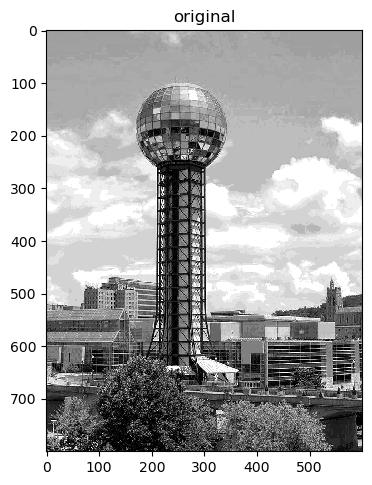

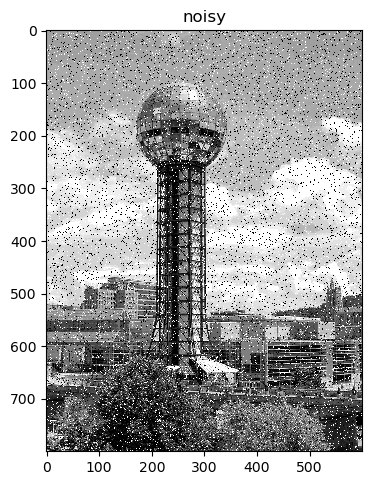

In [6]:
# Create noisy image. Show original and noisy images.
I2 = add_noise(I1, 0.05) #apply 5% salt and pepper noise
show_images(I1, 'original')
show_images(I2, 'noisy')


## Kernel Masks (Footprints)

In [7]:
def box(N, M=None):
     if M == None:
        M = N
        
     h = np.ones((N,M))
     return h

## Simplified Adaptive Median

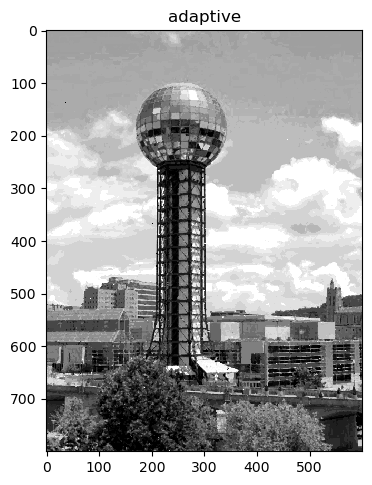

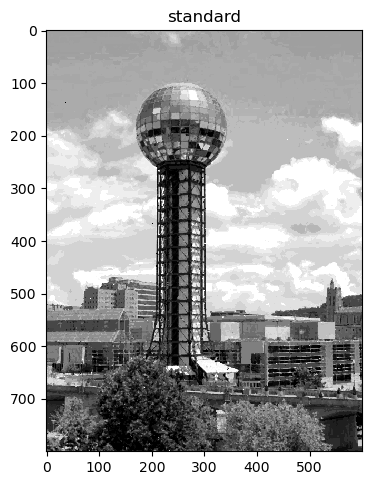

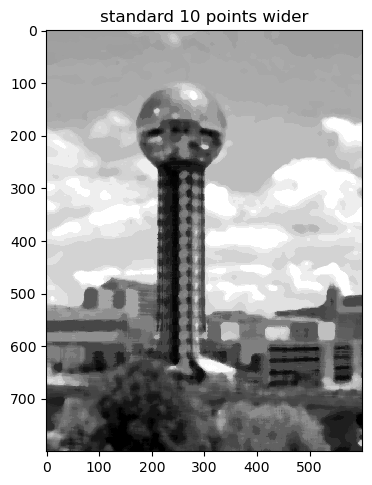

In [8]:
# Implement this



I3 = rank.median(I2, box(3))
#mask = np.where((I2 > I3 - 0.1) & (I2 < I3 + 0.1))
#I3[mask] = I2[mask]
mask = np.logical_and(I3 >= 0, I3 <= 255) #replaces extreme values
I3 = np.where(mask, I3, I2)


I4 = rank.median(I2, box(3))
I5 = rank.median(I2, box(13))

show_images(I3, 'adaptive')
show_images(I4, 'standard')
show_images(I5, 'standard 10 points wider')

#I4 = median_filter(I2, box(3))
#io.imshow(I4)

## Observations

The adaptive median filter effectively removes the salt-and-pepper noise while preserving the details of the original image. On the other hand, the standard median filter with a small box kernel also removes the noise. The standard median filter with a larger box kernel eliminates the noise but blurs the image to a certain extent.